In [61]:
import scrapy
from scrapy.crawler import CrawlerProcess
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import os
import time
import xlrd
import datetime as dt
from scrapy.exporters import JsonItemExporter, CsvItemExporter
from collections import defaultdict
import warnings

plt.style.use('ggplot')

warnings.filterwarnings('ignore')

os.chdir(r'C:\Learning\Scraping')
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
pd.set_option('display.float_format','{:,}'.format)

In [2]:
class Seresto(scrapy.Spider):

    name='Seresto_spider'
    
    '''
    Get the customer reviews for seresto pdts in chewy.com
    --- update url in urls variable for web scraping
    --- update xpath to get the relavant text based on objective
    --- update filepath to export the scraped text
    '''
    
    def __init__(self):
        self.op=[]
        self.op_rate=[]
        self.op_date=[]
        self.op_final=pd.DataFrame()

    def start_requests(self): #used to pull the HTML structure from the URL

        urls=[]

        for i in range(1,583): #incase there are paginations

            urls.append("https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber="+str(i))

        for url in urls:

            yield scrapy.Request(url=url,callback=self.parse) #calling the urls and extract in parse function

    def parse(self,response):

        revs=response.xpath('//span[contains(@class,"ugc-list__review__display")]/text()').extract() #review text variable
        
        rates=response.xpath('//span[contains(@class,"ugc-rev__stars ugc-list__list__stars")]/meta[contains(@itemprop,"ratingValue")]/@content').extract() #rating variable
        
        dates=response.xpath('//p[contains(@class,"ugc__user")]/span[2]/text()').extract() #rating variable

        filepath='C:\\Learning\\Scraping\\Scraped results.xlsx' #path with name for the export

        self.op.extend([rev for rev in revs])
        
        self.op_rate.extend(rates)
#         print(rates)

        self.op_date.extend(dates)
#         print(dates)
        
        pd.DataFrame([self.op,self.op_date,self.op_rate]).T.to_excel('Output_Seresto_final.xlsx')
                    
process=CrawlerProcess()

process.crawl(Seresto)

process.start()

2021-05-02 22:19:29 [scrapy.utils.log] INFO: Scrapy 2.4.1 started (bot: scrapybot)
2021-05-02 22:19:29 [scrapy.utils.log] INFO: Versions: lxml 4.5.1.0, libxml2 2.9.5, cssselect 1.1.0, parsel 1.6.0, w3lib 1.22.0, Twisted 21.2.0, Python 3.7.5 (tags/v3.7.5:5c02a39a0b, Oct 15 2019, 00:11:34) [MSC v.1916 64 bit (AMD64)], pyOpenSSL 19.0.0 (OpenSSL 1.1.1d  10 Sep 2019), cryptography 2.8, Platform Windows-10-10.0.19041-SP0
2021-05-02 22:19:29 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.selectreactor.SelectReactor
2021-05-02 22:19:29 [scrapy.crawler] INFO: Overridden settings:
{}
2021-05-02 22:19:29 [scrapy.extensions.telnet] INFO: Telnet Password: caa113a5a03e9c2a
2021-05-02 22:19:29 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.logstats.LogStats']
2021-05-02 22:19:29 [scrapy.middleware] INFO: Enabled downloader middlewares:
['scrapy.downloadermiddlewares.httpauth.HttpAuthMidd

2021-05-02 22:19:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=22> (referer: None)
2021-05-02 22:19:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=26> (referer: None)
2021-05-02 22:19:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=27> (referer: None)
2021-05-02 22:19:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=29> (referer: None)
2021-05-02 2

2021-05-02 22:19:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=62> (referer: None)
2021-05-02 22:19:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=63> (referer: None)
2021-05-02 22:19:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=64> (referer: None)
2021-05-02 22:19:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=59> (referer: None)
2021-05-02 2

2021-05-02 22:19:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=93> (referer: None)
2021-05-02 22:19:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=94> (referer: None)
2021-05-02 22:19:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=95> (referer: None)
2021-05-02 22:19:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=96> (referer: None)
2021-05-02 2

2021-05-02 22:20:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=127> (referer: None)
2021-05-02 22:20:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=128> (referer: None)
2021-05-02 22:20:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=129> (referer: None)
2021-05-02 22:20:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=130> (referer: None)
2021-05-

2021-05-02 22:20:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=161> (referer: None)
2021-05-02 22:20:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=162> (referer: None)
2021-05-02 22:20:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=163> (referer: None)
2021-05-02 22:20:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=164> (referer: None)
2021-05-

2021-05-02 22:20:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=189> (referer: None)
2021-05-02 22:20:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=195> (referer: None)
2021-05-02 22:20:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=196> (referer: None)
2021-05-02 22:20:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=197> (referer: None)
2021-05-

2021-05-02 22:21:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=228> (referer: None)
2021-05-02 22:21:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=229> (referer: None)
2021-05-02 22:21:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=230> (referer: None)
2021-05-02 22:21:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=231> (referer: None)
2021-05-

2021-05-02 22:21:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=262> (referer: None)
2021-05-02 22:21:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=259> (referer: None)
2021-05-02 22:21:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=263> (referer: None)
2021-05-02 22:21:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=266> (referer: None)
2021-05-

2021-05-02 22:22:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=295> (referer: None)
2021-05-02 22:22:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=296> (referer: None)
2021-05-02 22:22:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=297> (referer: None)
2021-05-02 22:22:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=298> (referer: None)
2021-05-

2021-05-02 22:22:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=328> (referer: None)
2021-05-02 22:22:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=329> (referer: None)
2021-05-02 22:22:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=330> (referer: None)
2021-05-02 22:22:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=331> (referer: None)
2021-05-

2021-05-02 22:23:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=363> (referer: None)
2021-05-02 22:23:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=364> (referer: None)
2021-05-02 22:23:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=357> (referer: None)
2021-05-02 22:23:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=365> (referer: None)
2021-05-

2021-05-02 22:23:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=395> (referer: None)
2021-05-02 22:23:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=396> (referer: None)
2021-05-02 22:24:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=397> (referer: None)
2021-05-02 22:24:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=398> (referer: None)
2021-05-

2021-05-02 22:24:36 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=422> (referer: None)
2021-05-02 22:24:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=429> (referer: None)
2021-05-02 22:24:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=436> (referer: None)
2021-05-02 22:24:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=430> (referer: None)
2021-05-

2021-05-02 22:25:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=462> (referer: None)
2021-05-02 22:25:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=463> (referer: None)
2021-05-02 22:25:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=464> (referer: None)
2021-05-02 22:25:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=465> (referer: None)
2021-05-

2021-05-02 22:26:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=495> (referer: None)
2021-05-02 22:26:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=496> (referer: None)
2021-05-02 22:26:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=497> (referer: None)
2021-05-02 22:26:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=498> (referer: None)
2021-05-

2021-05-02 22:27:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=528> (referer: None)
2021-05-02 22:27:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=529> (referer: None)
2021-05-02 22:27:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=530> (referer: None)
2021-05-02 22:27:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=531> (referer: None)
2021-05-

2021-05-02 22:27:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=561> (referer: None)
2021-05-02 22:28:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=563> (referer: None)
2021-05-02 22:28:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=564> (referer: None)
2021-05-02 22:28:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.chewy.com/seresto-flea-tick-collar-dogs-over-18/product-reviews/46497?partNumber=61518&id=46497&reviewSort=NEWEST&reviewFilter=ALL_STARS&pageNumber=565> (referer: None)
2021-05-

In [9]:
# creating df with correct info

df=pd.read_excel('Output_Seresto_final.xlsx')

df.columns=['Index','Text','Date','Rating']

df.drop('Index',axis=1,inplace=True)

display(f'Shape of the dataset is: {df.shape}',df[:20])

'Shape of the dataset is: (6984, 3)'

,Text,Date,Rating
0,Don’t buy the knock offs! The original Serest...,"Apr 25, 2021",1.0
1,We have been using Seresto for 2 years and thi...,"Apr 23, 2021",1.0
2,This Seresto collar stopped working by day 9! ...,"Apr 30, 2021",4.0
3,"We live in a woodsy area with plenty of ticks,...","Apr 30, 2021",1.0
4,My baby has been wearing her collar for a few ...,"Apr 30, 2021",5.0
5,Used these collars on all of our dogs for the ...,"Apr 29, 2021",5.0
6,My pups have thick fur and this works great. T...,"Apr 29, 2021",5.0
7,Have used this collar on my dogs every season ...,"Apr 29, 2021",5.0
8,I love this product! So easy to use. I do not...,"Apr 29, 2021",5.0
9,i have been using Seresto Flea and Tick Collar...,"Apr 28, 2021",5.0


In [22]:
5984-1164

4820

In [30]:
# keep rating separate

rating,date,text=[],[],[]

for x in range(0,6984,12):
    date.extend(df.loc[x+2:x+11,'Date'])
    text.extend(df.loc[x+2:x+11,'Text'])
    
for x in range(0,5820,10):
    rating.extend(df.loc[x:x+9,'Rating'])
    
final_df=pd.DataFrame([text,date,rating]).T

final_df.columns=['Text','Date','Rating']

display(f'Shape of the dataset is: {final_df.shape}',final_df[:100])

final_df.to_excel('Seresto_analysis.xlsx',index=False)

'Shape of the dataset is: (5820, 3)'

,Text,Date,Rating
0,This Seresto collar stopped working by day 9! ...,"Apr 30, 2021",1.0
1,"We live in a woodsy area with plenty of ticks,...","Apr 30, 2021",1.0
2,My baby has been wearing her collar for a few ...,"Apr 30, 2021",4.0
3,Used these collars on all of our dogs for the ...,"Apr 29, 2021",1.0
4,My pups have thick fur and this works great. T...,"Apr 29, 2021",5.0
5,Have used this collar on my dogs every season ...,"Apr 29, 2021",5.0
6,I love this product! So easy to use. I do not...,"Apr 29, 2021",5.0
7,i have been using Seresto Flea and Tick Collar...,"Apr 28, 2021",5.0
8,Easy & fast delivery. Lots of products availab...,"Apr 28, 2021",5.0
9,Love these collars! Shipping is also so fast a...,"Apr 28, 2021",5.0


2021-05-02 23:54:02 [matplotlib.pyplot] DEBUG: Loaded backend module://ipykernel.pylab.backend_inline version unknown.


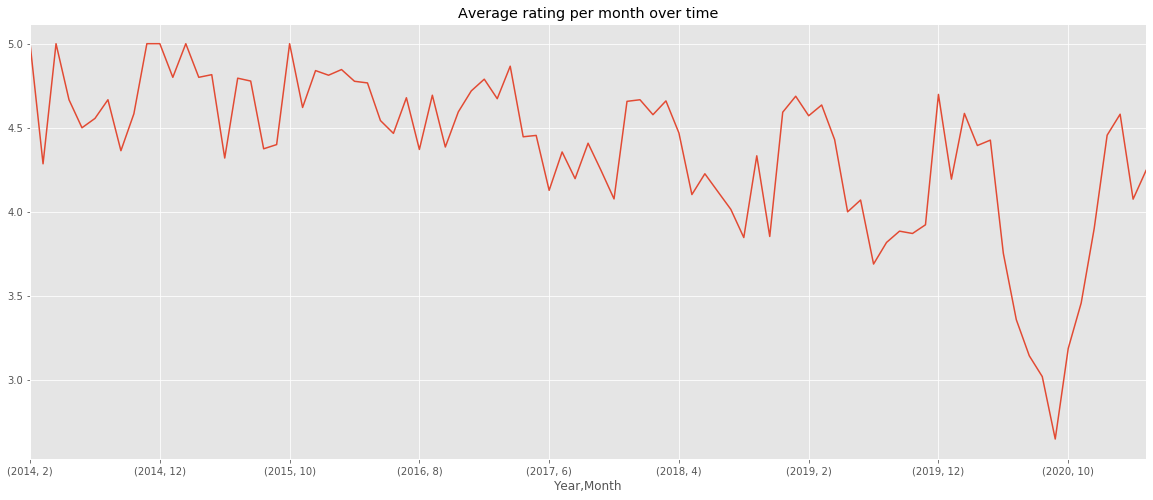

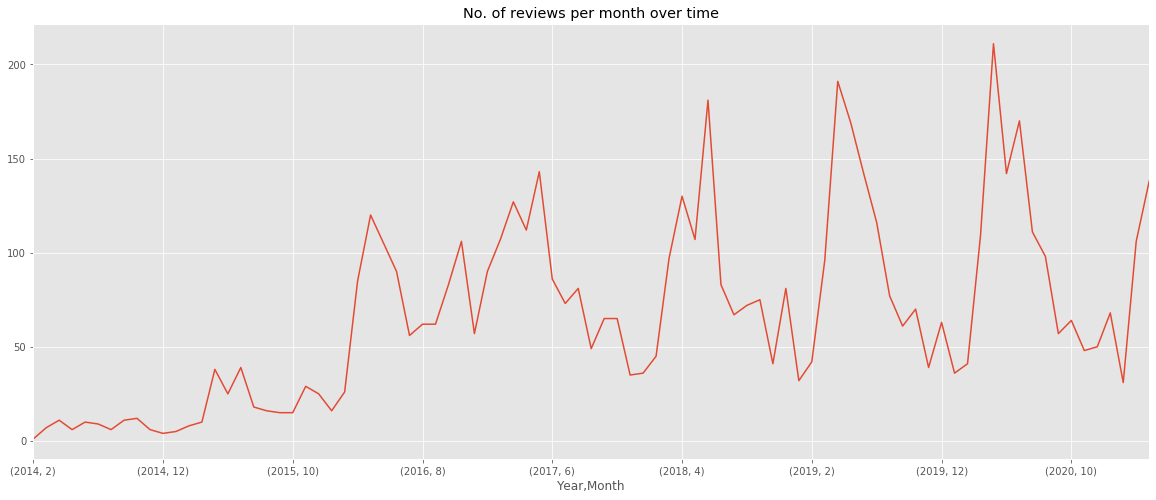

Average rating before 2021, March: 4.255738880918221 for 5576 reviews,
Average rating between March and April, 2021: 4.0754716981132075 for 106 reviews,
Average rating after 2021, April: 4.246376811594203 for 138 reviews


In [62]:
# eda

%matplotlib inline

final_df['Date']=pd.to_datetime(final_df['Date'])

final_df.sort_values('Date',ascending=False,inplace=True)

final_df['Rating']=pd.to_numeric(final_df['Rating'],errors='coerce')

final_df['Month']=final_df['Date'].dt.month

final_df['Year']=final_df['Date'].dt.year

plt.figure(figsize=(20,8))

final_df.groupby(['Year','Month'])['Rating'].mean().plot()

plt.title('Average rating per month over time')

plt.show()

plt.figure(figsize=(20,8))

final_df.groupby(['Year','Month'])['Rating'].size().plot()

plt.title('No. of reviews per month over time')

plt.show()

# average rating before Mar 2021, between Mar and Apr 2021, finally after Apr 2021

print(f"""Average rating before 2021, March: {final_df.loc[final_df['Date']<'2021-03-01','Rating'].mean()} for {final_df.loc[final_df['Date']<'2021-03-01','Rating'].shape[0]} reviews,
Average rating between March and April, 2021: {final_df.loc[(final_df['Date']>='2021-03-01')&(final_df['Date']<'2021-04-01'),'Rating'].mean()} for {final_df.loc[(final_df['Date']>='2021-03-01')&(final_df['Date']<'2021-04-01'),'Rating'].shape[0]} reviews,
Average rating after 2021, April: {final_df.loc[(final_df['Date']>='2021-04-01'),'Rating'].mean()} for {final_df.loc[(final_df['Date']>='2021-04-01'),'Rating'].shape[0]} reviews""")